In [1]:
import sys

sys.path.append("../")

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import data.drawings.make_tasks as drawing_tasks
from src.analysis_utilities import SynthesisExperimentAnalyzer
from src.config_builder import ExperimentType

/opt/conda/envs/laps/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
sns.set_theme(style="whitegrid", font_scale=1.25, rc={'figure.figsize':(12, 8)})

In [5]:
%config InlineBackend.figure_format = 'retina'

In [6]:
EXPERIMENT_NAME = "runs_2"
# EXPERIMENT_NAME = "benchmarks"
# EXPERIMENT_NAME = "test_benchmarks_temp"
DOMAIN = "re2"
# DOMAIN = "clevr"
COMPUTE_LIKELIHOODS = True

FIGURES_DIR = os.path.join("figures", EXPERIMENT_NAME)
FIGURES_DOMAIN_DIR = os.path.join("figures", EXPERIMENT_NAME, DOMAIN)
os.makedirs(FIGURES_DOMAIN_DIR, exist_ok=True)

In [7]:
analyzer = SynthesisExperimentAnalyzer(
    experiment_name=EXPERIMENT_NAME,
    allow_incomplete_results=True,
    compute_likelihoods=COMPUTE_LIKELIHOODS,
    batch_size = 96,
)

Experiment directory: ../experiments_iterative/outputs/runs_2
Available domains: ['re2']


# Analysis 1: Tasks solved over time

### Tasks solved vs. LAPS iteration

In [8]:
df = analyzer.get_synthesis_results_for_domain(DOMAIN)
df

,request,task,programs,best_search_time,split,seed,iteration,experiment_type
0,"{'constructor': '->', 'arguments': [{'construc...",re2_train_0_if_the_word_ends_with_any_letter_a...,[],NaN,train,0,0,baseline_dreamcoder
1,"{'constructor': '->', 'arguments': [{'construc...",re2_train_1_if_there_is_consonant_replace_that...,[],NaN,train,0,0,baseline_dreamcoder
2,"{'constructor': '->', 'arguments': [{'construc...",re2_train_2_if_the_word_ends_with_consonant_s_...,[],NaN,train,0,0,baseline_dreamcoder
3,"{'constructor': '->', 'arguments': [{'construc...",re2_train_3_if_there_is_d_replace_that_with_y,[],NaN,train,0,0,baseline_dreamcoder
4,"{'constructor': '->', 'arguments': [{'construc...",re2_train_4_if_there_is_b_add_k_before_that,[],NaN,train,0,0,baseline_dreamcoder
...,...,...,...,...,...,...,...,...
6905,"{'constructor': '->', 'arguments': [{'construc...",re2_test_495_if_there_is_vowel_n_replace_that_...,[],NaN,test,0,9,baseline_dreamcoder
6906,"{'constructor': '->', 'arguments': [{'construc...",re2_test_496_if_the_word_ends_with_any_letter_...,[{'program': '(lambda (#(lambda (lambda (_rfla...,35.343075,test,0,9,baseline_dreamcoder
6907,"{'constructor': '->', 'arguments': [{'construc...",re2_test_497_if_the_word_starts_with_any_lette...,[{'program': '(lambda (#(lambda (lambda (lambd...,49.901366,test,0,9,baseline_dreamcoder
6908,"{'constructor': '->', 'arguments': [{'construc...",re2_test_498_if_there_is_vowel_r_add_u_before_...,[],NaN,test,0,9,baseline_dreamcoder


In [9]:
df_results = (
    df.groupby(["experiment_type", "seed", "iteration", "split"])
    .best_search_time.count()
    .reset_index(name="n_solved")
)

# Duplicate "benchmark_enumeration" for n_iterations
df_list = [df_results[df_results.experiment_type != "enumeration"]]
for iteration in sorted(df_results.iteration.unique()):
    df_tmp = df_results[df_results.experiment_type == "enumeration"].copy()
    df_tmp["iteration"] = iteration
    df_list.append(df_tmp)
df_results = pd.concat(df_list, axis=0).reset_index(drop=True)

df_results

,experiment_type,seed,iteration,split,n_solved
0,baseline_dreamcoder,0,0,test,125
1,baseline_dreamcoder,0,0,train,19
2,baseline_dreamcoder,0,1,train,36
3,baseline_dreamcoder,0,2,train,53
4,baseline_dreamcoder,0,3,test,125
5,baseline_dreamcoder,0,3,train,75
6,baseline_dreamcoder,0,4,train,90
7,baseline_dreamcoder,0,5,train,94
8,baseline_dreamcoder,0,6,test,124
9,baseline_dreamcoder,0,6,train,94


<AxesSubplot:xlabel='iteration', ylabel='n_solved'>

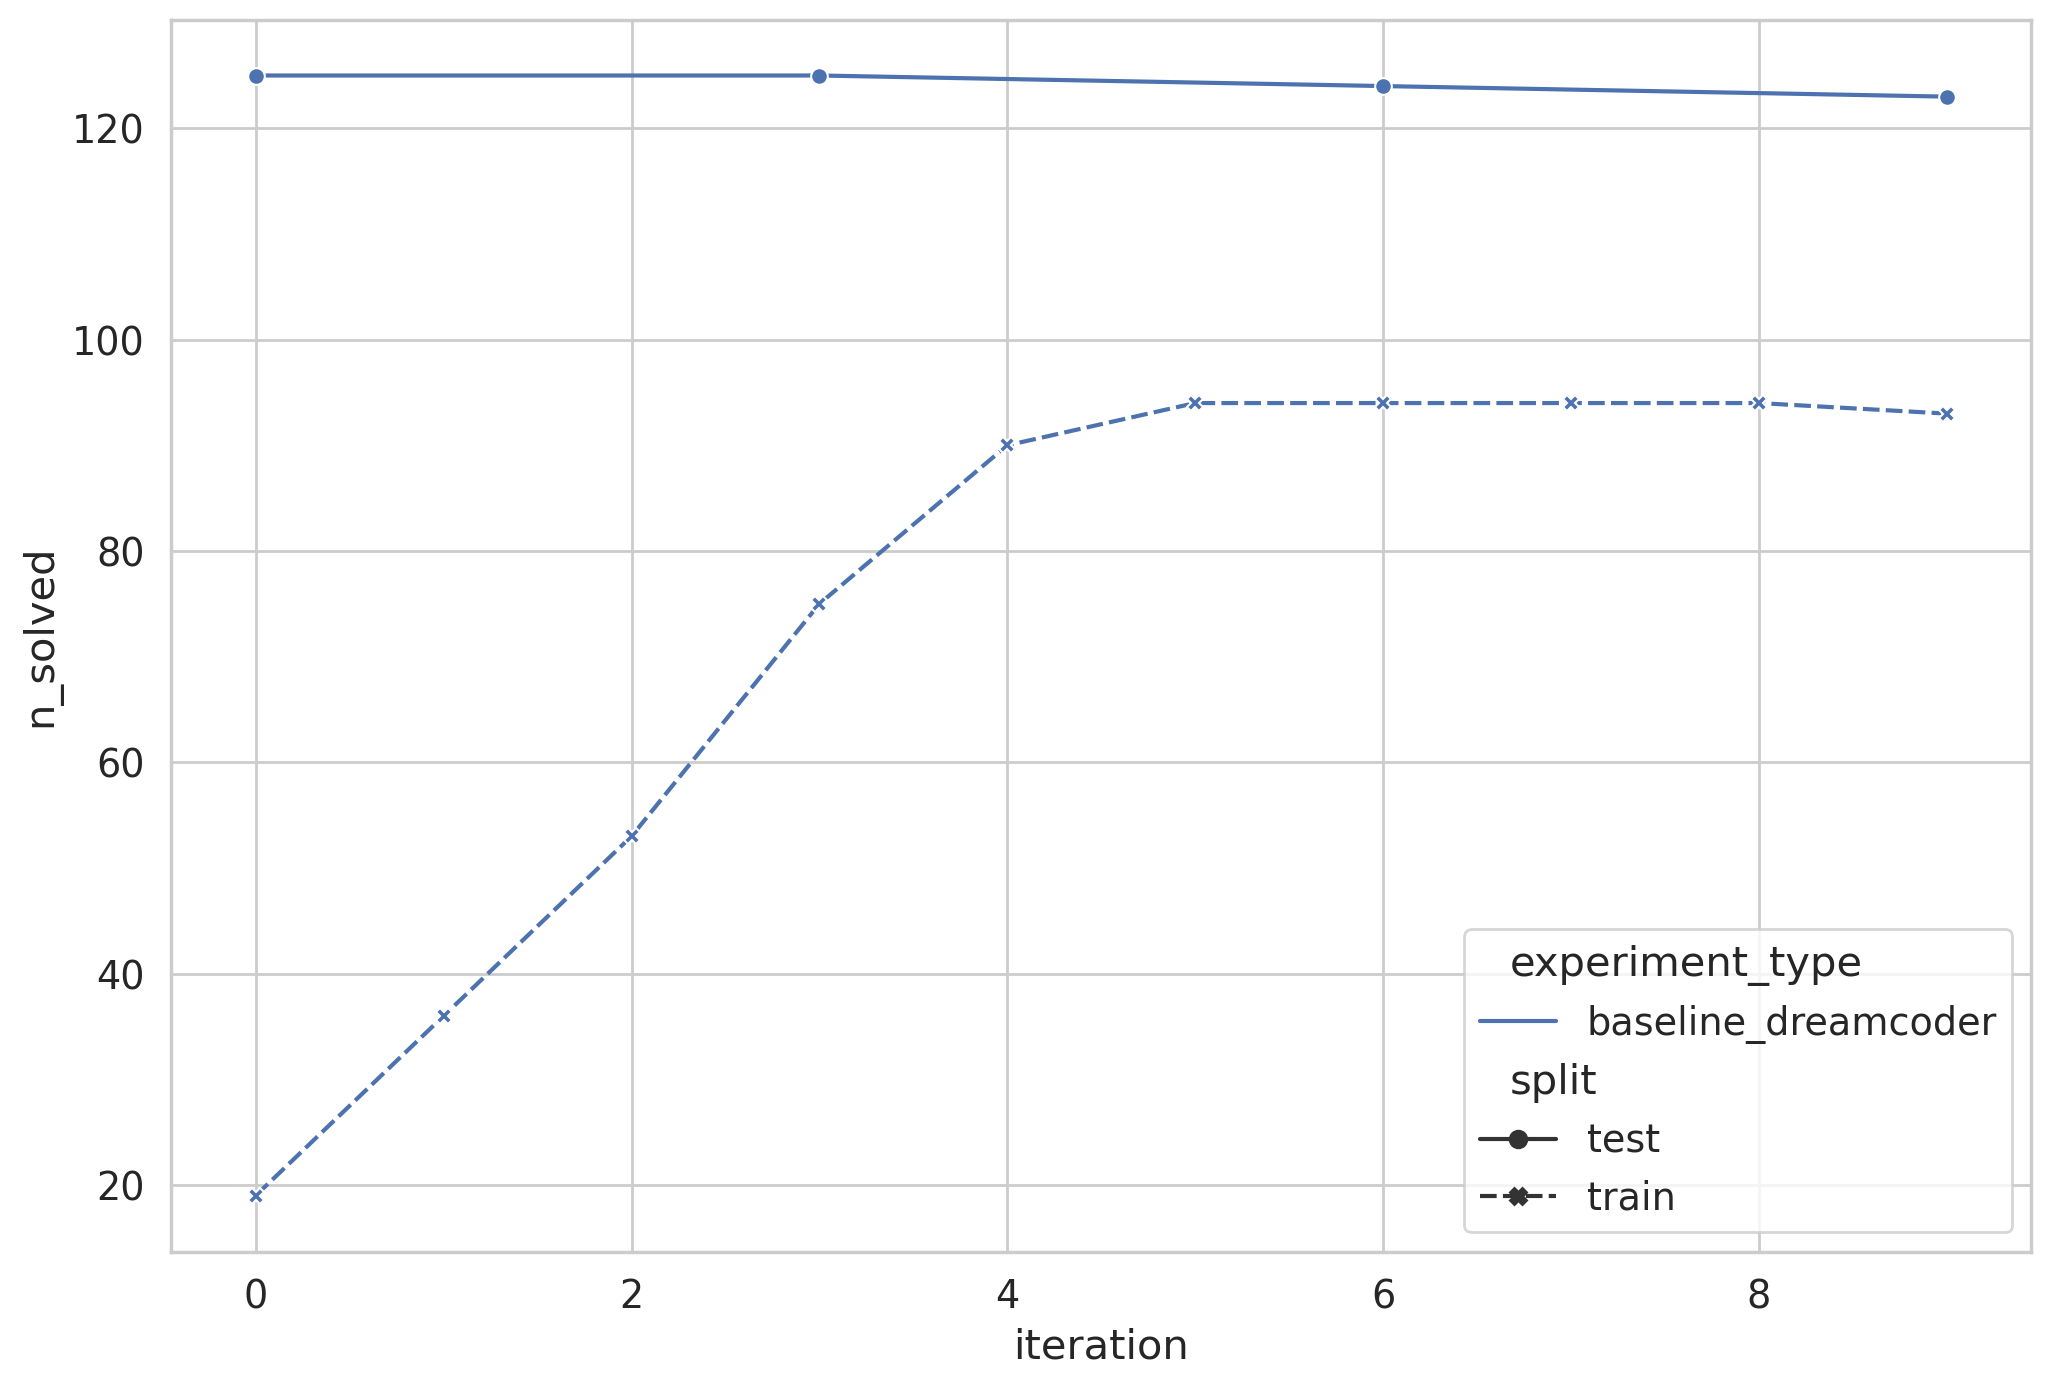

In [10]:
sns.lineplot(
    data=df_results, x="iteration", y="n_solved", hue="experiment_type", style="split", markers=True
)

### Tasks solved vs. search time

In [11]:
df_search_time = analyzer.get_search_time_results_for_domain(DOMAIN)
df_search_time

Using enumeration_timeout: 720


,time,n_solved,experiment_type,seed,iteration,split
0,0,0,baseline_dreamcoder,0,0,test
1,1,0,baseline_dreamcoder,0,0,test
2,2,0,baseline_dreamcoder,0,0,test
3,3,0,baseline_dreamcoder,0,0,test
4,4,0,baseline_dreamcoder,0,0,test
...,...,...,...,...,...,...
10089,716,93,baseline_dreamcoder,0,9,train
10090,717,93,baseline_dreamcoder,0,9,train
10091,718,93,baseline_dreamcoder,0,9,train
10092,719,93,baseline_dreamcoder,0,9,train


In [12]:
df_search_time[df_search_time.split == "train"].query("iteration == 2")

,time,n_solved,experiment_type,seed,iteration,split
2163,0,0,baseline_dreamcoder,0,2,train
2164,1,0,baseline_dreamcoder,0,2,train
2165,2,0,baseline_dreamcoder,0,2,train
2166,3,0,baseline_dreamcoder,0,2,train
2167,4,0,baseline_dreamcoder,0,2,train
...,...,...,...,...,...,...
2879,716,53,baseline_dreamcoder,0,2,train
2880,717,53,baseline_dreamcoder,0,2,train
2881,718,53,baseline_dreamcoder,0,2,train
2882,719,53,baseline_dreamcoder,0,2,train


Text(0.5, 1.0, 'train')

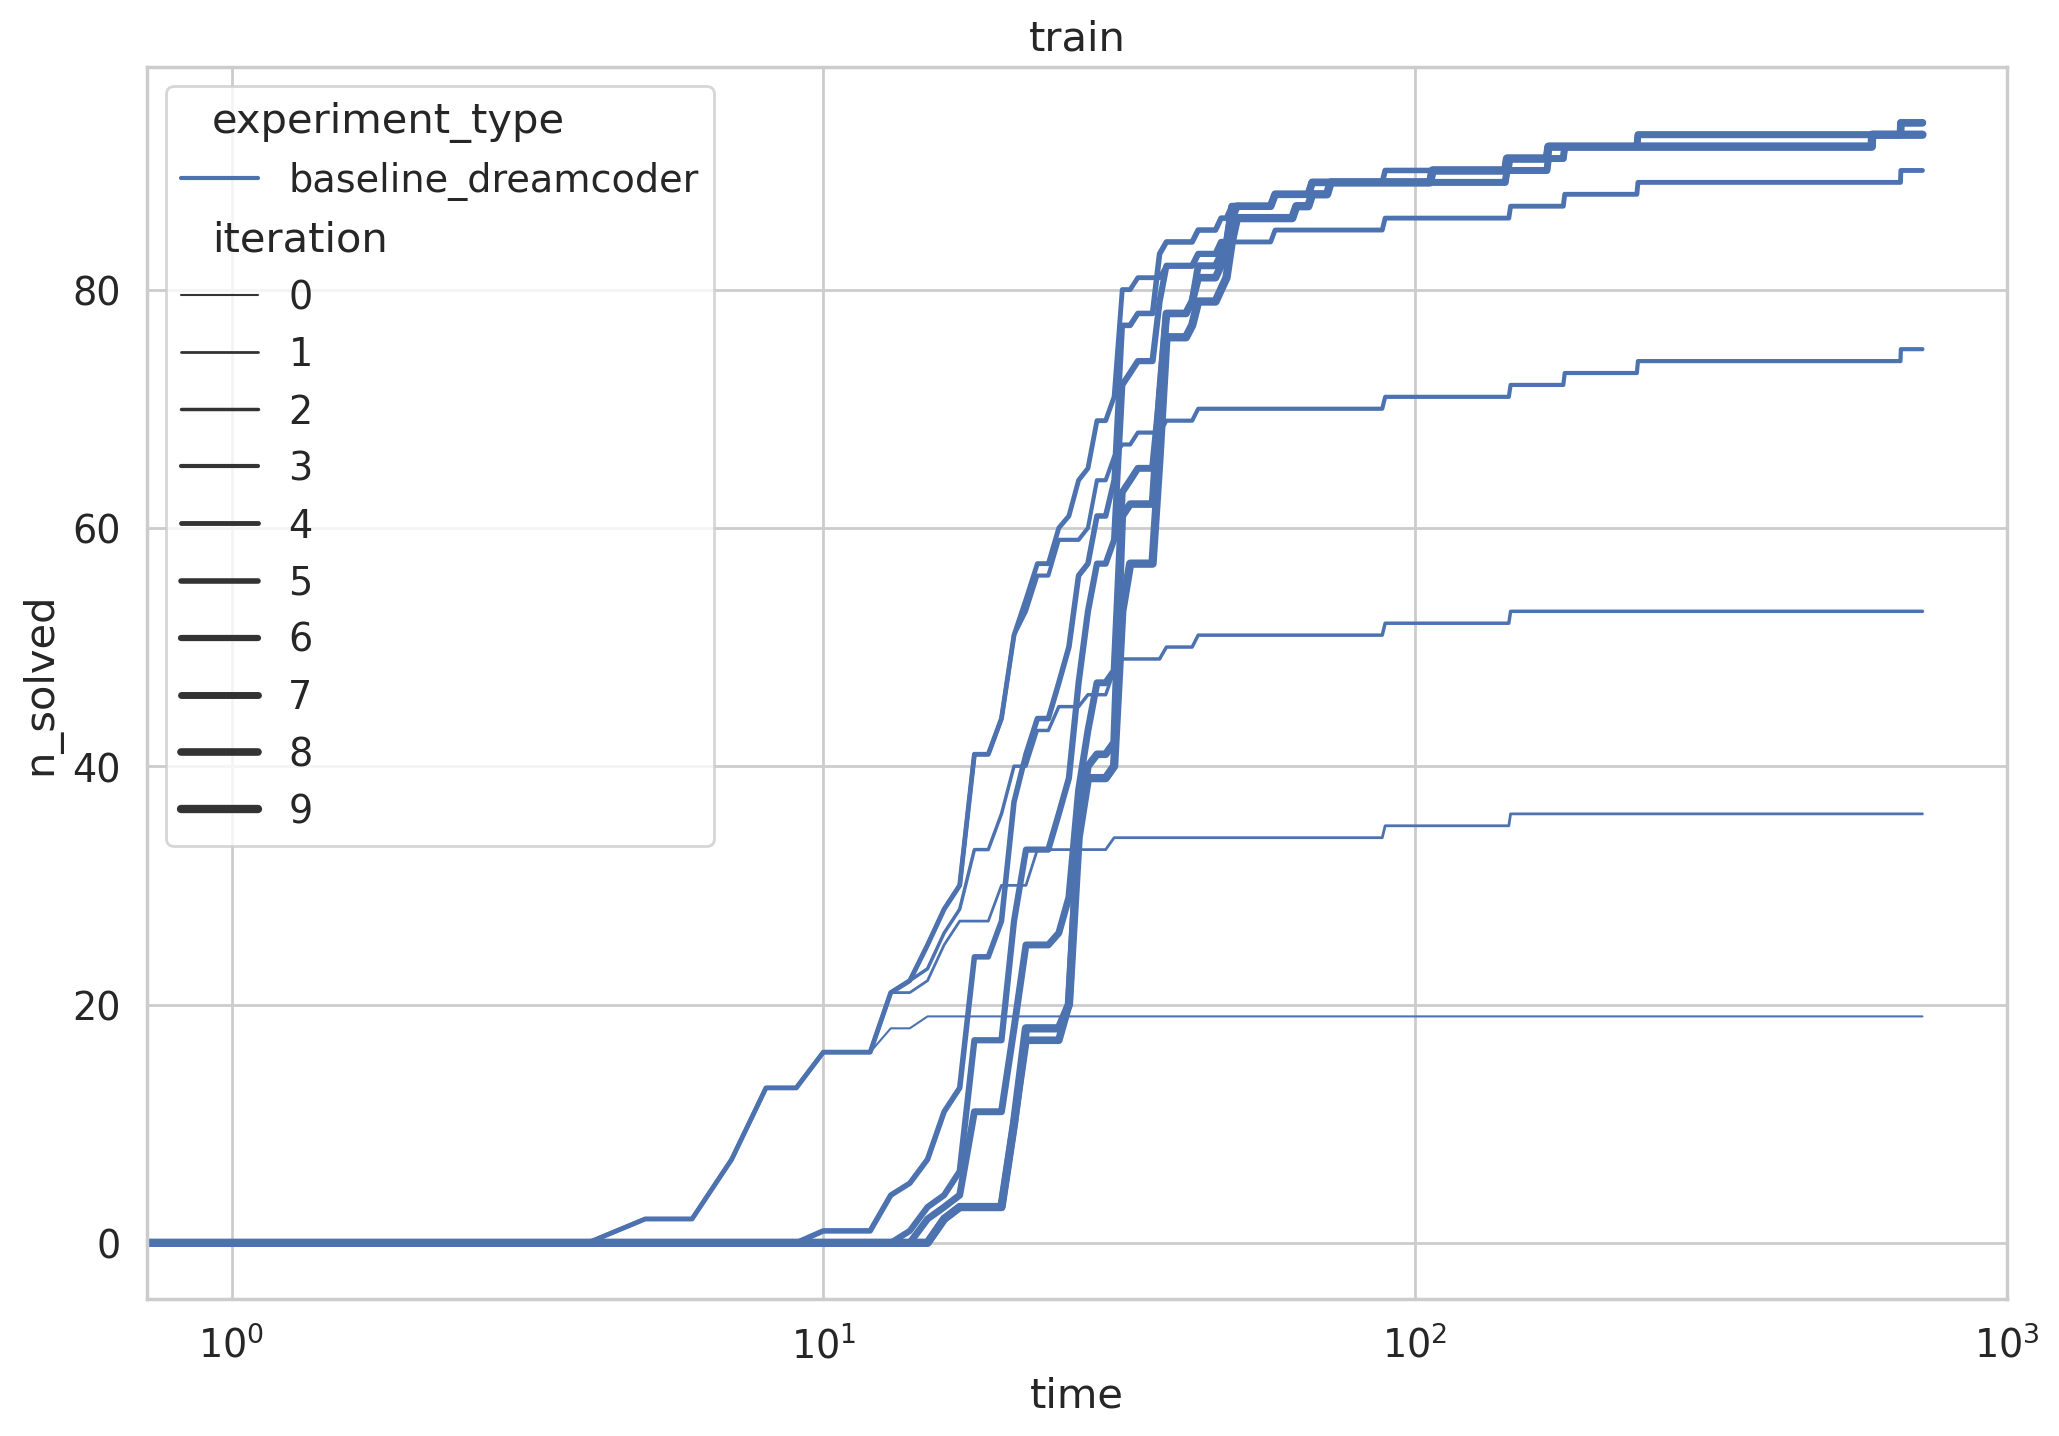

In [13]:
g = sns.lineplot(
    data=df_search_time[df_search_time.split == "train"],
    x="time",
    y="n_solved",
    hue="experiment_type",
    size="iteration",
    legend="full",
)
g.set(xscale='log')
plt.title("train")

Text(0.5, 1.0, 'test')

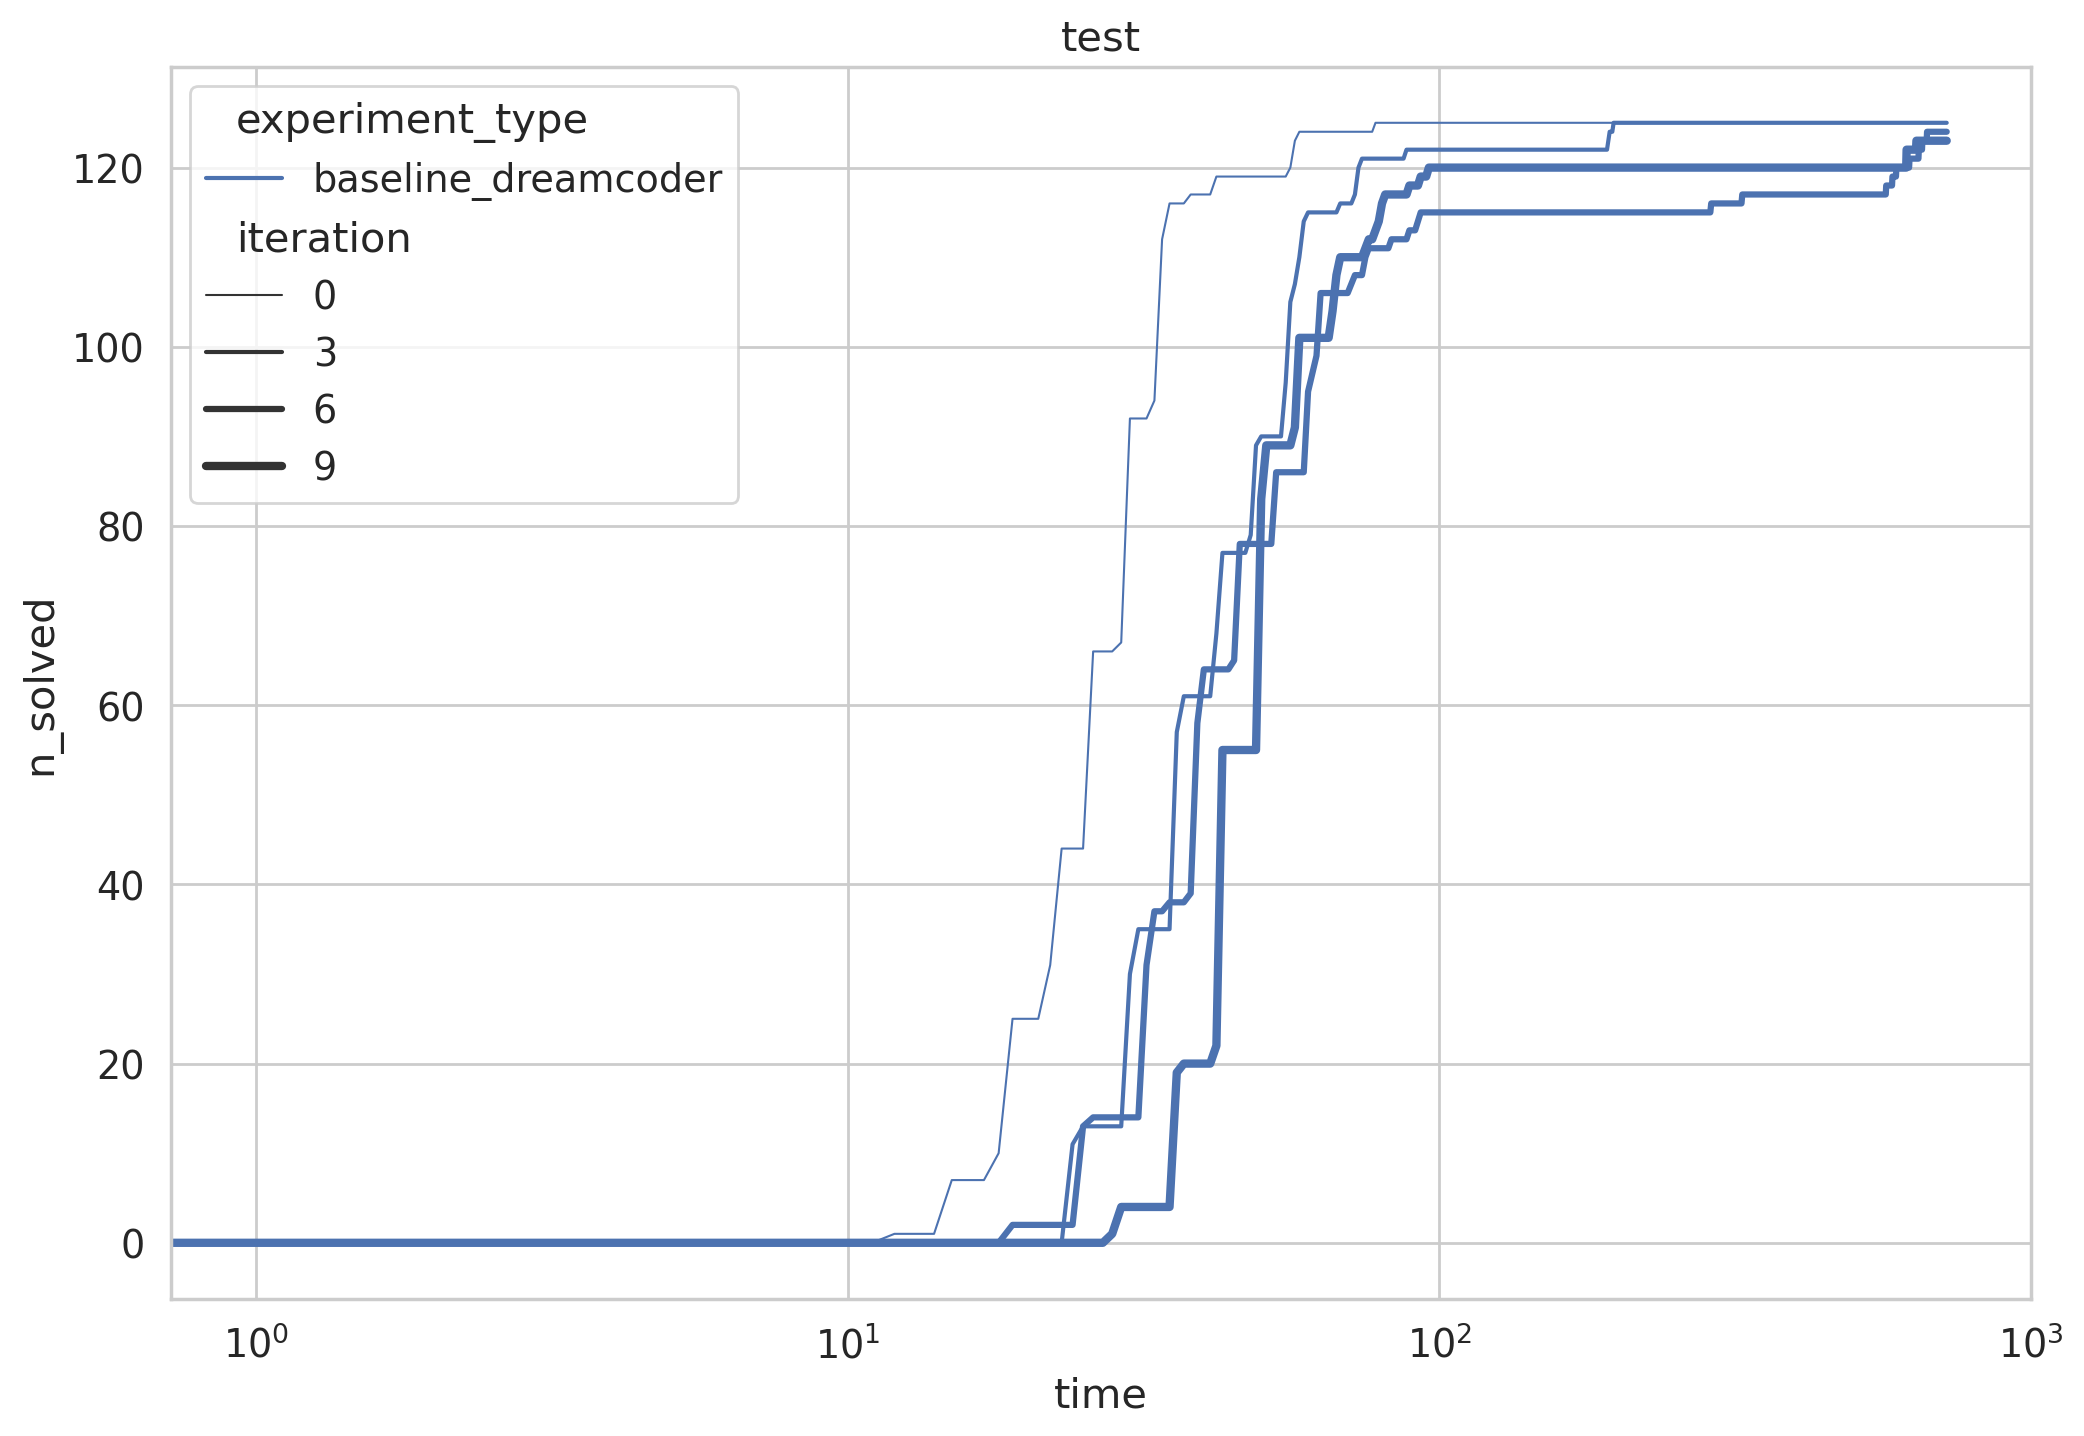

In [14]:
g = sns.lineplot(
    data=df_search_time[df_search_time.split == "test"],
    x="time",
    y="n_solved",
    hue="experiment_type",
    size="iteration",
    legend="full",
)
g.set(xscale='log')
plt.title("test")

<AxesSubplot:xlabel='time', ylabel='n_solved'>

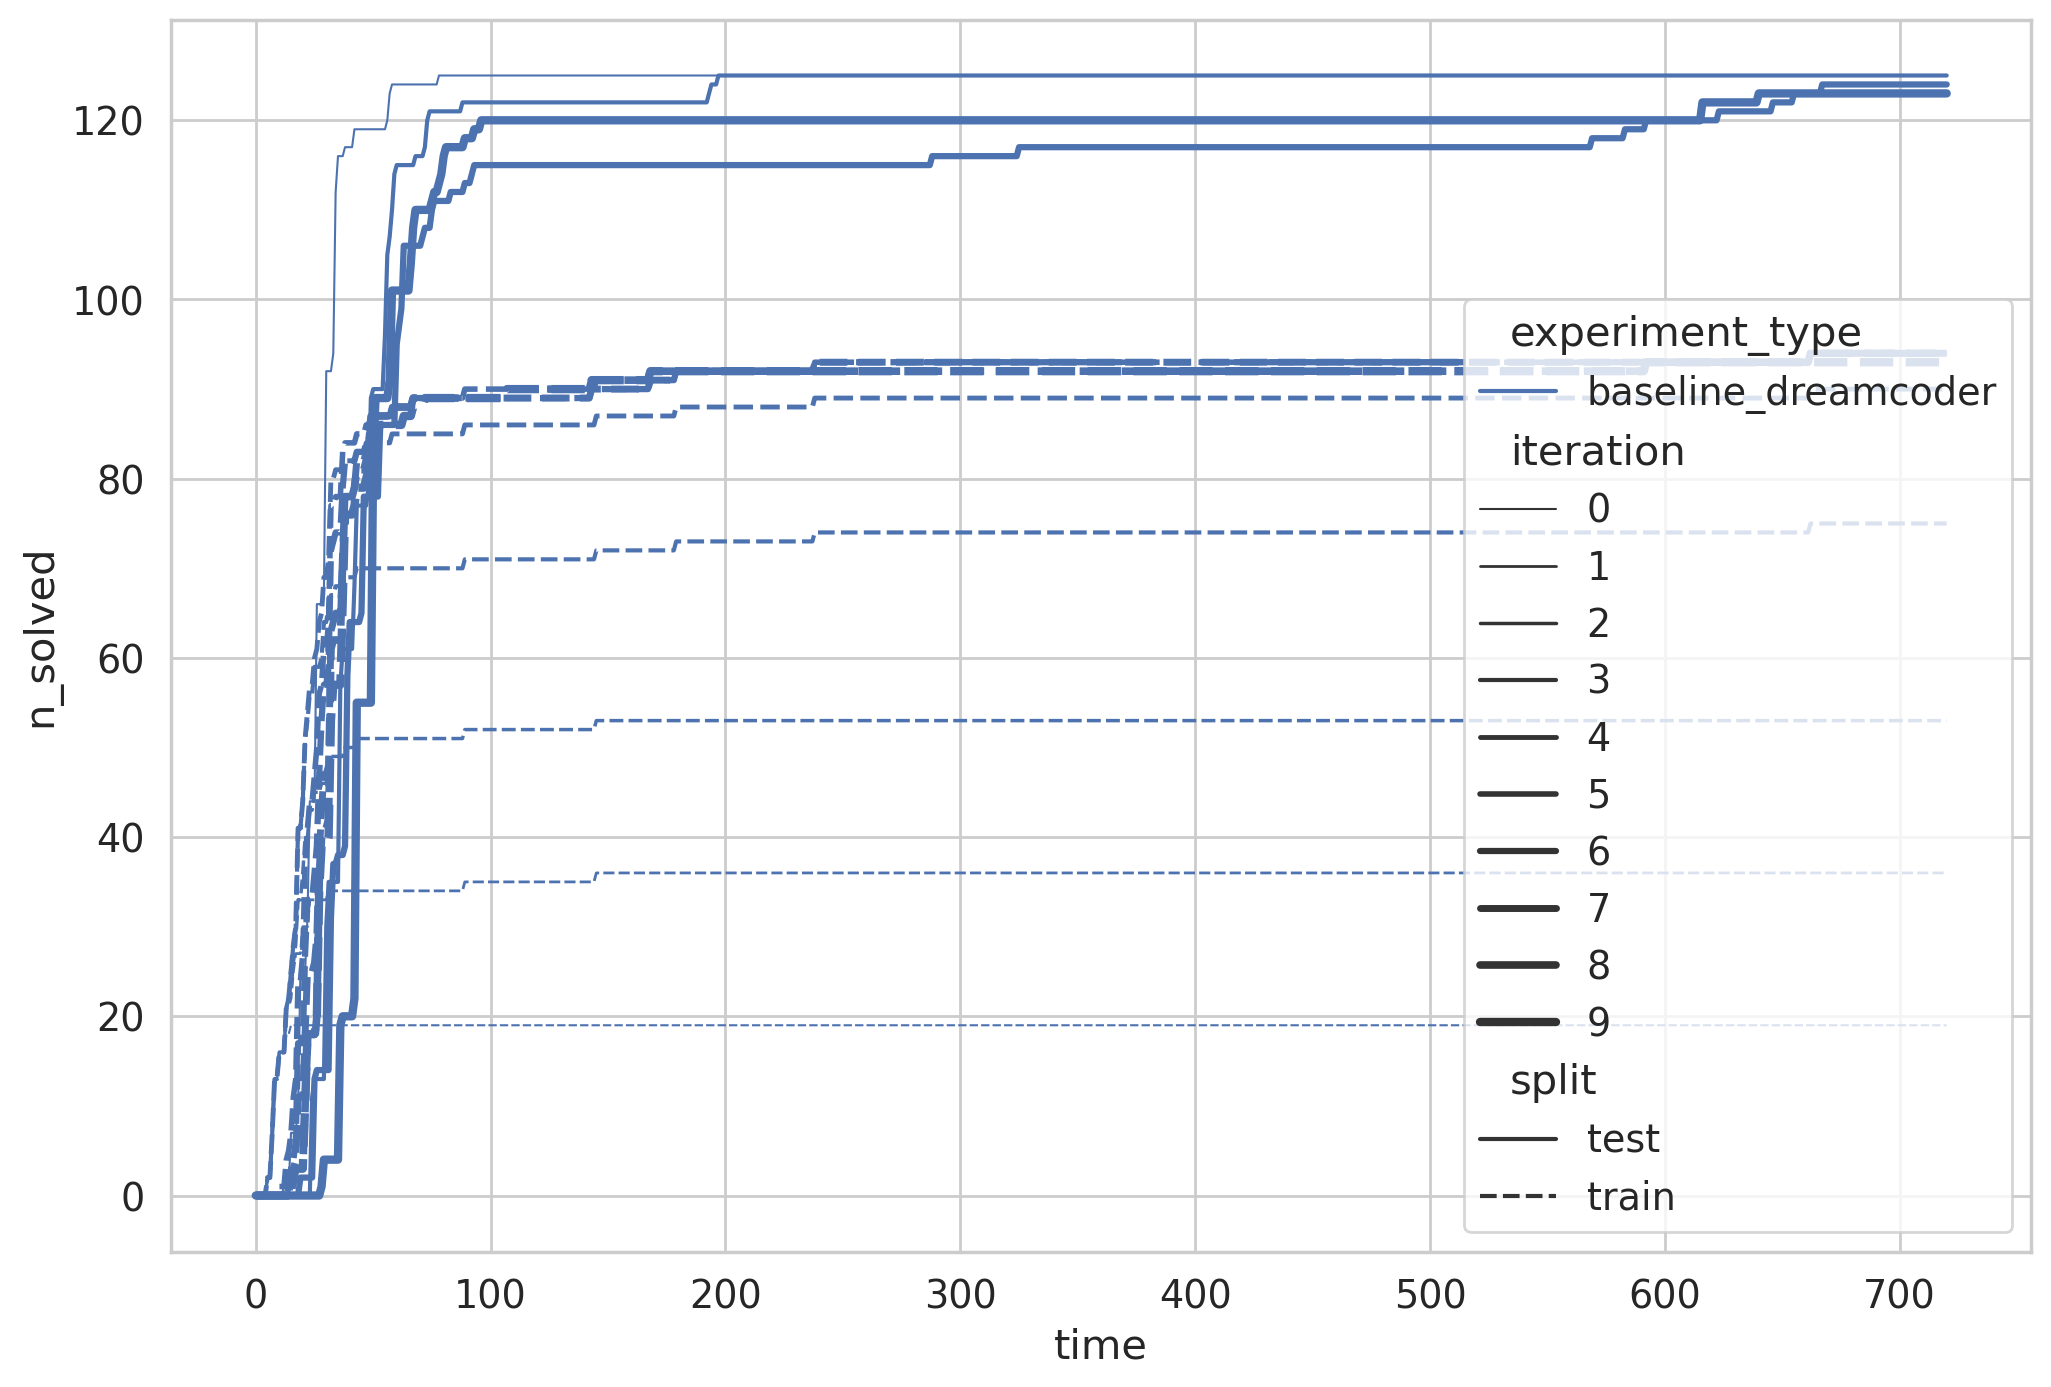

In [15]:
sns.lineplot(
    data=df_search_time,
    x="time",
    y="n_solved",
    hue="experiment_type",
    style="split",
    size="iteration",
    legend="full",
)

# Analysis 2: Library abstractions

In [16]:
df_asbtractions = analyzer.get_abstractions_for_domain(DOMAIN)
df_asbtractions

,name,arity,utility,compression_ratio,cumulative_compression_ratio,body,dreamcoder,experiment_type,random_seed,iteration,batch_size
0,fn_0,3,3030,1.234284,1.234284,(_rflatten (cons #2 (cons #1 (cdr (_rsplit _rd...,#(lambda (lambda (lambda (_rflatten (cons $0 (...,baseline_dreamcoder,0,0,96
1,fn_1,2,1515,1.132685,1.398056,(_rflatten (map #1 (_rsplit _rdot #0))),#(lambda (lambda (_rflatten (map $0 (_rsplit _...,baseline_dreamcoder,0,0,96
2,fn_2,3,1212,1.118754,1.564080,(_rflatten (_rappend #2 (_rappend #1 (_rrevcdr...,#(lambda (lambda (lambda (_rflatten (_rappend ...,baseline_dreamcoder,0,0,96
3,fn_3,2,606,1.063125,1.662813,(_rflatten (_rappend #1 (_rsplit _a #0))),#(lambda (lambda (_rflatten (_rappend $0 (_rsp...,baseline_dreamcoder,0,0,96
4,fn_4,2,606,1.067378,1.774850,(_rflatten (cons #1 (_rsplit _b #0))),#(lambda (lambda (_rflatten (cons $0 (_rsplit ...,baseline_dreamcoder,0,0,96
...,...,...,...,...,...,...,...,...,...,...,...
94,fn_5,1,202,1.032253,2.258343,(_rsplit _rempty #0),#(lambda (_rsplit _rempty $0)),baseline_dreamcoder,0,9,96
95,fn_6,2,202,1.033328,2.333608,(fn_3 #1 #0 _rempty),#(lambda (lambda (#(lambda (lambda (lambda (_r...,baseline_dreamcoder,0,9,96
96,fn_7,2,101,1.016946,2.373154,(_rflatten (_rappend #1 #0)),#(lambda (lambda (_rflatten (_rappend $0 $1)))),baseline_dreamcoder,0,9,96
97,fn_8,3,101,1.017238,2.414064,(_rflatten (cons #2 (cons #1 (cdr (_rsplit _rd...,#(lambda (lambda (lambda (_rflatten (cons $0 (...,baseline_dreamcoder,0,9,96


In [17]:
with pd.option_context('display.max_colwidth', None, 'display.max_rows', None):
    display(df_asbtractions.sort_values(["name", "iteration"])[["name", "iteration", "arity", "compression_ratio", "body"]])

,name,iteration,arity,compression_ratio,body
0,fn_0,0,3,1.234284,(_rflatten (cons #2 (cons #1 (cdr (_rsplit _rdot #0)))))
10,fn_0,1,3,1.254173,(_rflatten (cons #2 (cons #1 (cdr (_rsplit _rdot #0)))))
20,fn_0,2,3,1.333208,(_rflatten (cons #2 (cons #1 (cdr (_rsplit _rdot #0)))))
30,fn_0,3,3,1.324439,(_rflatten (cons #2 (cons #1 (cdr (_rsplit _rdot #0)))))
40,fn_0,4,2,1.282457,(_rflatten (cons #1 (cons _rempty (cdr (_rsplit _rdot #0)))))
50,fn_0,5,3,1.242939,(_rflatten (cons #2 (cons #1 (cdr (_rsplit _rdot #0)))))
60,fn_0,6,3,1.323748,(_rflatten (cons #2 (cons #1 (cdr (_rsplit _rdot #0)))))
69,fn_0,7,3,1.296913,(_rflatten (cons #2 (cons #1 (cdr (_rsplit _rdot #0)))))
79,fn_0,8,3,1.362915,(_rflatten (cons #2 (cons #1 (cdr (_rsplit _rdot #0)))))
89,fn_0,9,2,1.372404,(_rflatten (cons #1 (cons _rempty (cdr (_rsplit _rdot #0)))))


<AxesSubplot:xlabel='name', ylabel='compression_ratio'>

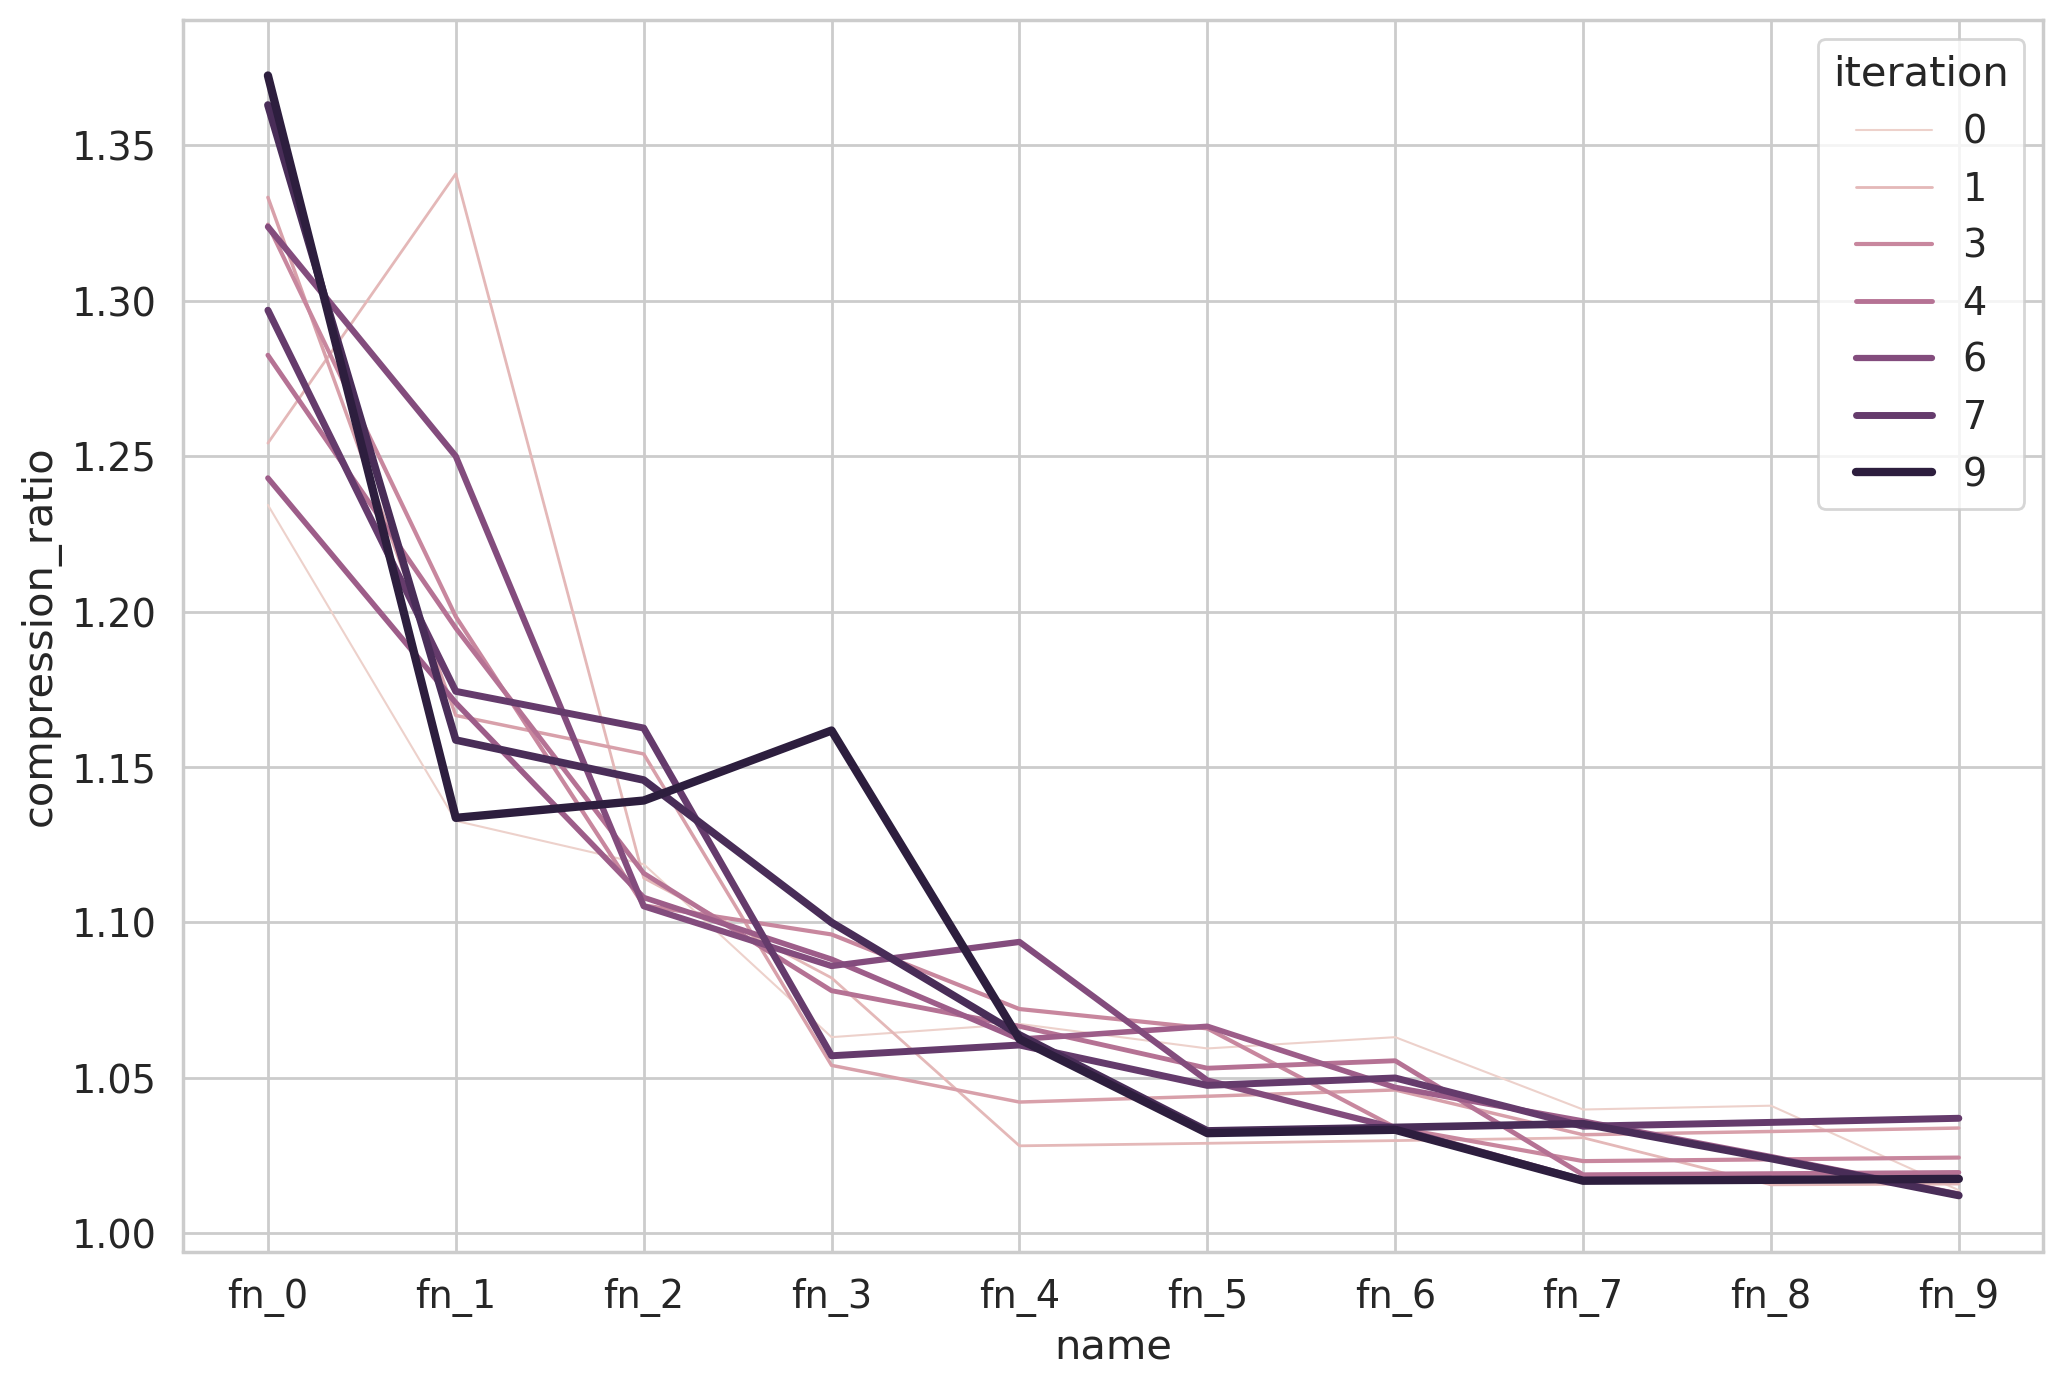

In [18]:
sns.lineplot(data=df_asbtractions, x="name", y="compression_ratio", size="iteration", hue="iteration")

<AxesSubplot:xlabel='name', ylabel='cumulative_compression_ratio'>

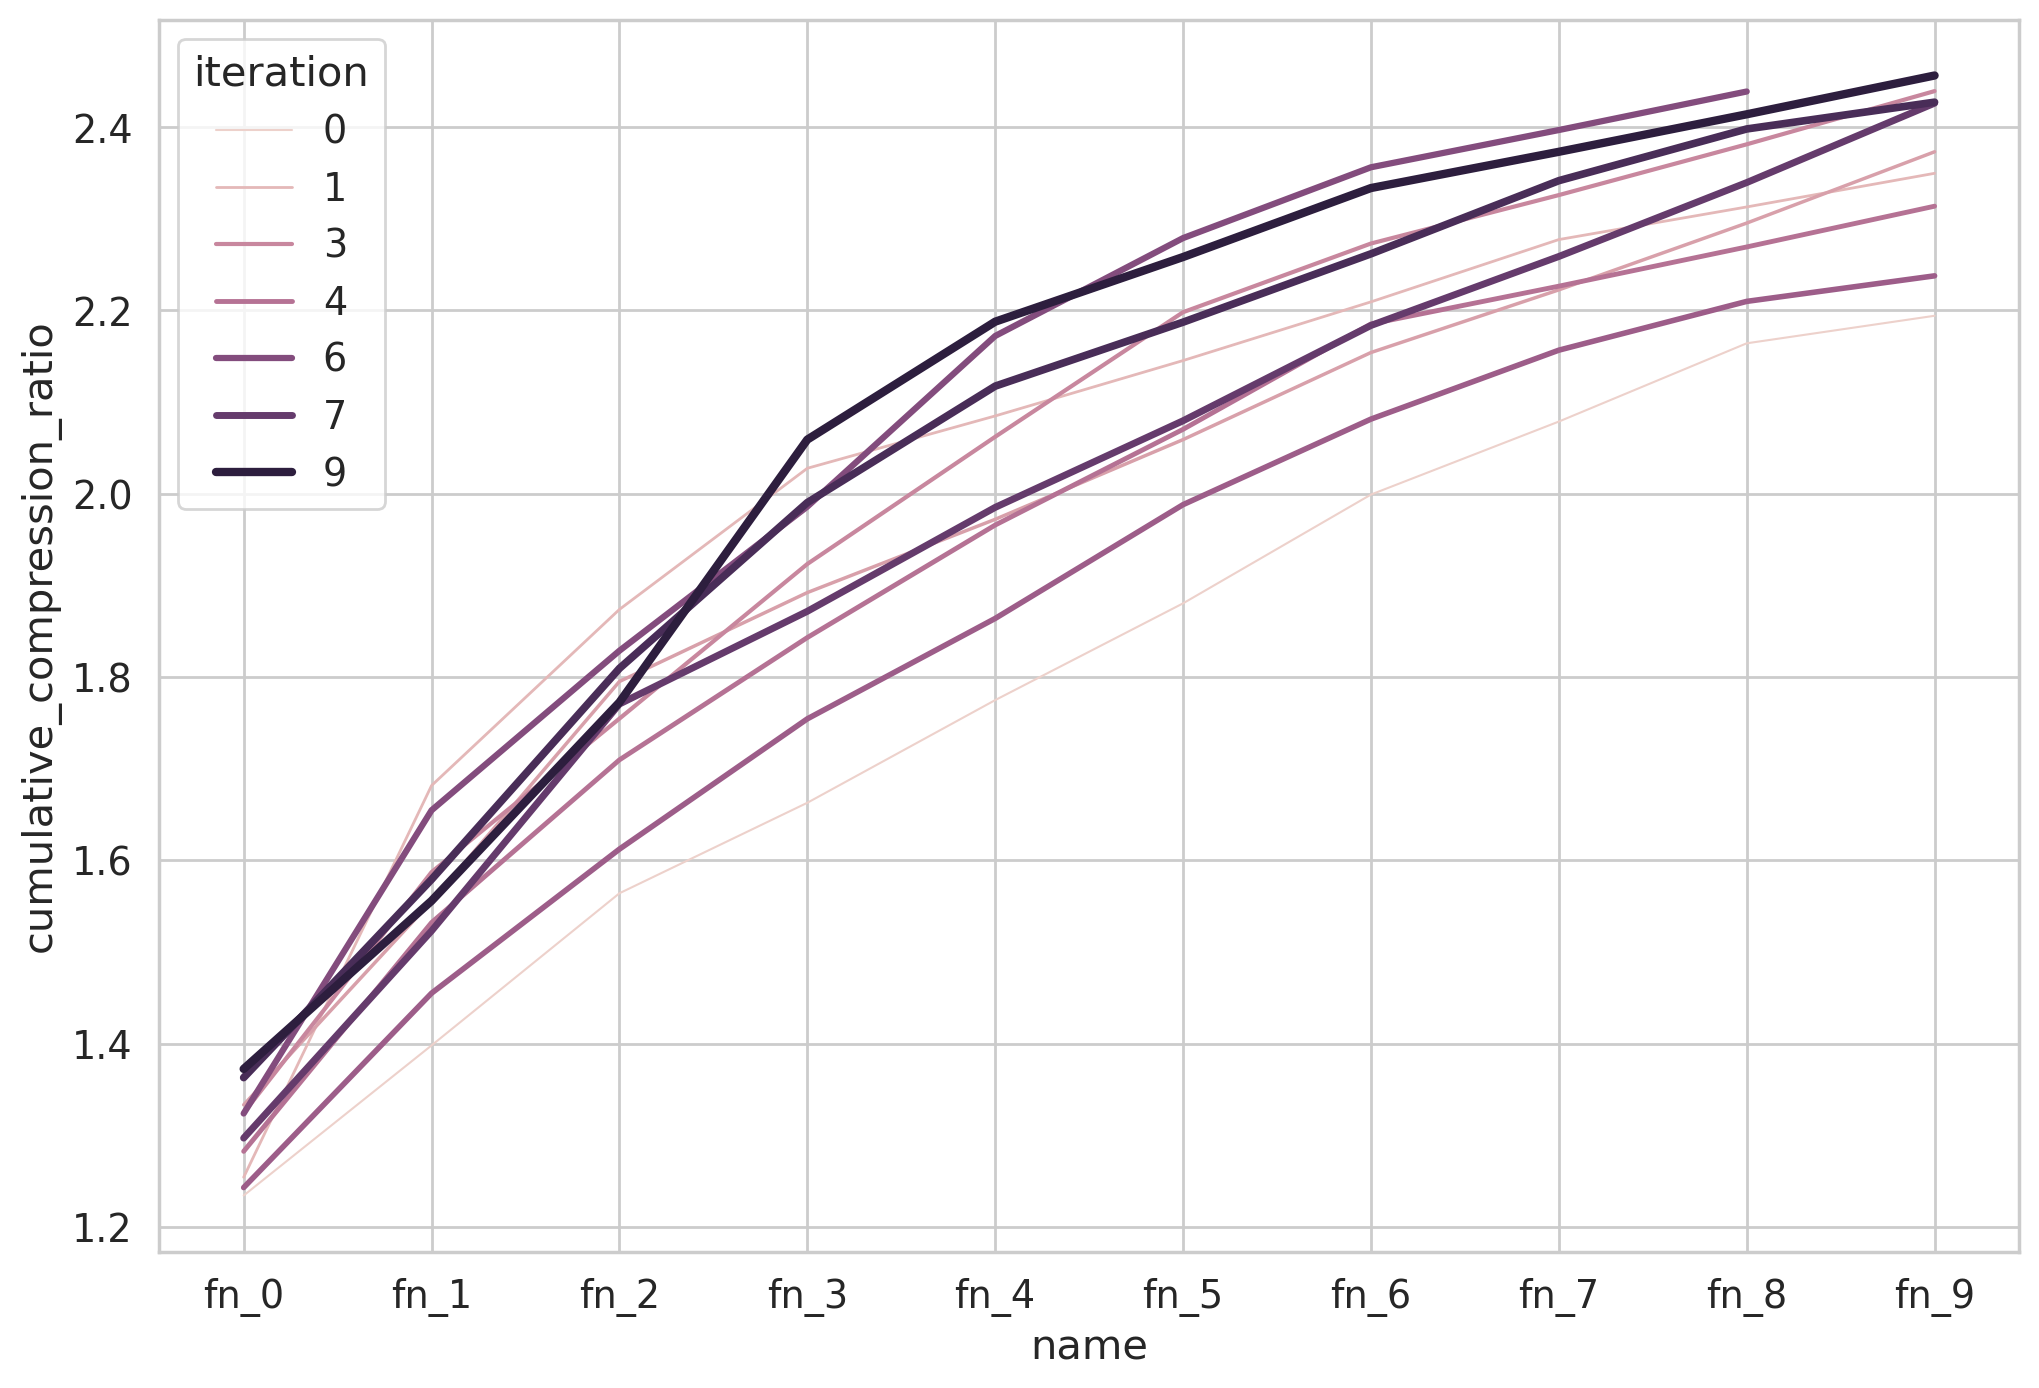

In [19]:
sns.lineplot(data=df_asbtractions, x="name", y="cumulative_compression_ratio", size="iteration", hue="iteration")

# Analysis 3: Solved programs

In [28]:
df = analyzer.get_synthesis_results_for_domain(DOMAIN)
df.to_csv("re2_search_results.csv")

In [27]:
df[~pd.isnull(df.best_search_time)].query("split == 'train'").query("iteration == 0")

,request,task,programs,best_search_time,split,seed,iteration,experiment_type
28,"{'constructor': '->', 'arguments': [{'construc...",re2_train_29_if_the_word_ends_with_any_letter_...,[{'program': '(lambda (_rflatten (_rappend _u ...,9.199801,train,0,0,baseline_dreamcoder
58,"{'constructor': '->', 'arguments': [{'construc...",re2_train_60_if_the_word_starts_with_any_lette...,[{'program': '(lambda (_rflatten (cons _e (con...,4.404088,train,0,0,baseline_dreamcoder
64,"{'constructor': '->', 'arguments': [{'construc...",re2_train_66_if_the_word_starts_with_any_lette...,[{'program': '(lambda (_rflatten (cons _j (_rs...,7.591114,train,0,0,baseline_dreamcoder
69,"{'constructor': '->', 'arguments': [{'construc...",re2_train_71_if_the_word_starts_with_any_lette...,[{'program': '(lambda (_rflatten (cons _w (con...,7.658523,train,0,0,baseline_dreamcoder
127,"{'constructor': '->', 'arguments': [{'construc...",re2_train_129_if_there_is_any_letter_replace_t...,[{'program': '(lambda (_rflatten (map (lambda ...,7.688766,train,0,0,baseline_dreamcoder
130,"{'constructor': '->', 'arguments': [{'construc...",re2_train_132_if_the_word_ends_with_any_letter...,[{'program': '(lambda (_rflatten (_rappend _t ...,12.477013,train,0,0,baseline_dreamcoder
188,"{'constructor': '->', 'arguments': [{'construc...",re2_train_191_if_the_word_starts_with_any_lett...,[{'program': '(lambda (_rflatten (cons (car (_...,14.725776,train,0,0,baseline_dreamcoder
219,"{'constructor': '->', 'arguments': [{'construc...",re2_train_223_if_there_is_any_letter_replace_t...,[{'program': '(lambda (_rflatten (map (lambda ...,12.718067,train,0,0,baseline_dreamcoder
224,"{'constructor': '->', 'arguments': [{'construc...",re2_train_229_if_there_is_any_letter_replace_t...,[{'program': '(lambda (_rflatten (map (lambda ...,6.155981,train,0,0,baseline_dreamcoder
259,"{'constructor': '->', 'arguments': [{'construc...",re2_train_264_if_the_word_starts_with_any_lett...,[{'program': '(lambda (_rflatten (cons _k (con...,4.886013,train,0,0,baseline_dreamcoder
